In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas_profiling as pp

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,train_test_split, cross_validate
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

# Importing Data

We will import the data and rename the attributes to make things more human readable.

### Description of the attributes
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    serum = LDL + hd_trainL + .2 * triglycerides
    above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality. can range from mild symptoms to severe problems. signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy. Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
13. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when exercising
14. target - have disease or not (0 is healthy, 1,2,3,4 is sick). This is the target attribute we will predict.

In [14]:
hd = pd.read_csv('../data/processed.cleveland.data', header=None)
hd.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_electrocardiographic", "max_heart_rate_achieved", "exercise_induced_angina", "ST_depression_induced_by_exercise", "peak_exercise_st_slope", "major_vessels_count", "thalassemia", "target"]
hd.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,peak_exercise_st_slope,major_vessels_count,thalassemia,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
hd.shape

(303, 14)

In [16]:
hd.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise,peak_exercise_st_slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


We recode the target to only differentiate between "has heart disease" (1) and "does not have heart disease" (0).
This is applied to all data before we split the dataset into a training set, `hd_train`, that will be used for exploratory data analysis (EDA) and model training, and a test dataset, `hd_test`, that will be used for a final test of the selected model for prediction.

To ensure that we have an equivalent split of individuals with and without heart disease, we will set the parameter `stratify` to `hd["target"]` so that we have an equivalent number of data points in our test and model data.

We double-check stratification is correct by checking the mean of the target column in each data set.

In [17]:
hd["target"] = hd["target"].replace([0,1,2,3,4],[0,1,1,1,1])
hd_train, hd_test = train_test_split(hd, test_size=0.2, random_state=42, stratify=hd["target"])

test_target = hd_test["target"]
train_target = hd_train["target"]

print(f"Test stratification is: {test_target.mean()}")
print(f"Train stratification is: {train_target.mean()}")

Test stratification is: 0.45901639344262296
Train stratification is: 0.45867768595041325


We output both datasets to separate CSVs so that we can bring in a clean version of the training dataset after EDA. This will ensure we have full control over the processing steps applied after EDA to both training and test data when they are used.

In [18]:
hd_train.to_csv("../data/processed/train")
hd_test.to_csv("../data/processed/final_dataset_test")

# Pandas Profile Report
Here we create a pandas profile report and save it to the processed file. This line of code is commented out as we only need to run it once. The profile provides some good insights on the different variables and would be a good place to start next time. It was discovered as a tool half-way through the pre-processing.

In [19]:
# profile = pp.ProfileReport(hd_train, title="Profile Report of Heart Disease Dataset")
# profile.to_file("../data/processed/hd_data_profile.html")

We change the datatypes for categorical and numerical data to help with our visualization functions we will call later.

In [20]:
objectAttributesKey = ["sex", "chest_pain_type", "fasting_blood_sugar", "resting_electrocardiographic", "exercise_induced_angina", "peak_exercise_st_slope", "major_vessels_count", "thalassemia", "target"]
objectAttributes = {i: "object" for i in objectAttributesKey}

integerAttributesKey = ["age", "resting_blood_pressure", "cholesterol", "max_heart_rate_achieved", "ST_depression_induced_by_exercise"]
integerAttributes = {i: "float" for i in integerAttributesKey}

attributeTypes = objectAttributes | integerAttributes
hd_train=hd_train.astype(attributeTypes)

hd_train.dtypes

age                                  float64
sex                                   object
chest_pain_type                       object
resting_blood_pressure               float64
cholesterol                          float64
fasting_blood_sugar                   object
resting_electrocardiographic          object
max_heart_rate_achieved              float64
exercise_induced_angina               object
ST_depression_induced_by_exercise    float64
peak_exercise_st_slope                object
major_vessels_count                   object
thalassemia                           object
target                                object
dtype: object

In [21]:
hd_train.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,ST_depression_induced_by_exercise
count,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.549587,130.958678,249.838843,149.962810,0.999174
std,8.996981,17.622551,52.846867,22.686449,1.122940
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,212.000000,134.500000,0.000000
50%,56.000000,130.000000,244.500000,153.500000,0.800000
75%,61.000000,140.000000,277.750000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [22]:
hd_train.describe(include="object")

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic,exercise_induced_angina,peak_exercise_st_slope,major_vessels_count,thalassemia,target
count,242.0,242.0,242.0,242.0,242.0,242.0,242,242,242
unique,2.0,4.0,2.0,3.0,2.0,3.0,5,4,2
top,1.0,4.0,0.0,0.0,0.0,1.0,0.0,3.0,0
freq,165.0,117.0,207.0,123.0,163.0,116.0,147,135,131


# Taking Care of missing data

We will look for missing values in our dataset.

In [23]:
print(hd_train.shape)
hd1=hd_train.dropna()
print(hd1.shape)

(242, 14)
(242, 14)


While working with the data, it was found that calling the "to_numeric" function on our dataframe resulted in an error that identified some rows with a "?" in the value position. As we will need to apply a programmatic approach to our test data, we will impute this value based on the global average of the training data set.

In [24]:
hd_train[hd_train["thalassemia"]!="?"]["thalassemia"].apply(pd.to_numeric).mean()
hd_train[hd_train["major_vessels_count"]!="?"]["major_vessels_count"].apply(pd.to_numeric).mean()

4.713692946058091

0.6099585062240664

In [25]:
hd_train.loc[hd_train["thalassemia"] == "?", "thalassemia"] = float(4.687)
hd_train.loc[hd_train["major_vessels_count"] == "?", "major_vessels_count"] = float(0.629)

We will add this imputation to a processing function at the end of our EDA

We replace the target variable naming to make visualizations more readable.

In [26]:
hd_train["target"] = hd_train["target"].replace([0,1],["Healthy", "Sick"])
hd_train["sex"] = hd_train["sex"].replace([0,1],["Female", "Male"])

Now let's take a look at our data again. We can check the distribution between healthy and sick individuals, and get an overview of the dataset for numerical and categorical variables.

In [27]:
hd_train['target'].value_counts()

Healthy    131
Sick       111
Name: target, dtype: int64

# Finding Outliers

We will take a look at the 1.5*IQR and visualize with boxplots to see if there are any outliers we need to deal with.
Boxplots will be plotted against our tagert value of healthy and unhealthy to start seeing if there is any correlation between our numerical attributes and target variable.

<AxesSubplot:xlabel='age'>

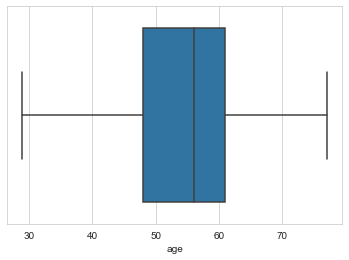

In [28]:
sns.boxplot(x=hd_train["age"])

,lower,upper,out of range values
age,28.5,80.5,0
resting_blood_pressure,90.0,170.0,6
cholesterol,113.375,376.375,5
max_heart_rate_achieved,87.25,213.25,1
ST_depression_induced_by_exercise,-2.4,4.0,4


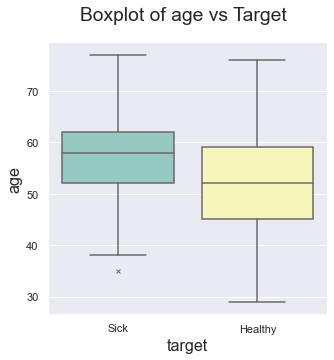

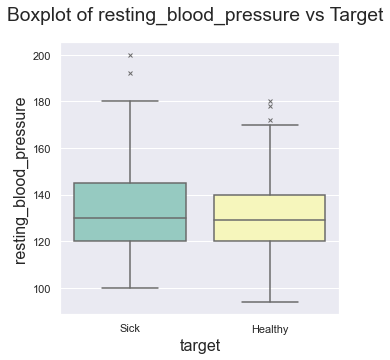

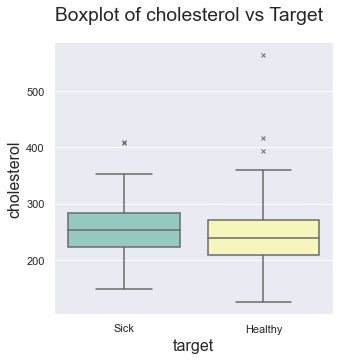

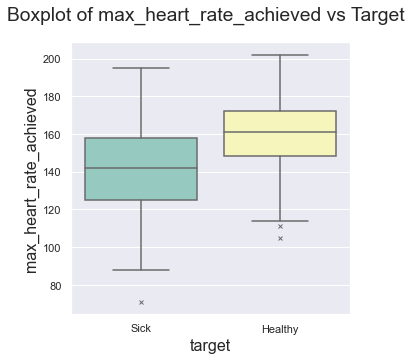

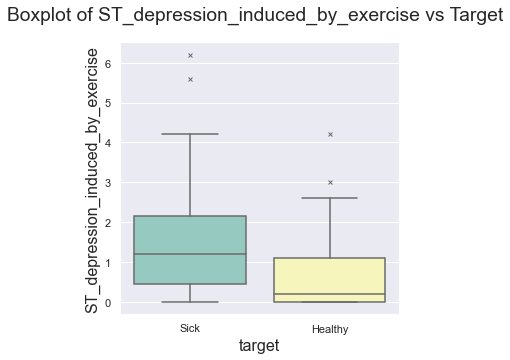

In [29]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.set_context(rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16})

# Initialize dataframe for IQR*1.5 values
IQR_df = pd.DataFrame(index=['age'],
                          columns=['lower', 'upper','out of range values'])


for i in integerAttributesKey:
    #Note: here we assigne the plots to a variable to suppress unwanted seaborn text in the output
    plot = plt.figure(i)
    plot_data = sns.boxplot(x="target", y=i, data=hd_train, orient="v", palette="Set3", flierprops = dict(marker="x", markersize = 4))
    plot_subtitle = plt.suptitle(f"Boxplot of {i} vs Target")

    # Print IQR and ceiling floor values
    Q1 = hd_train[i].quantile(0.25)
    Q3 = hd_train[i].quantile(0.75)
    IQR = Q3 - Q1
    low_outliers = Q1 - 1.5 * IQR
    upper_outliers = Q3 + 1.5 * IQR
    number_of_outliers = hd_train[i][(hd_train[i] < low_outliers) | (hd_train[i] > upper_outliers)].count()

    IQR_df.loc[i,:] = [low_outliers, upper_outliers, number_of_outliers]

IQR_df

### Outlier Decision
Based on these results, there are not many outlier values. Given the box plot visualizations, the majority of outliers are not deemed to be noise and will not be removed from the dataset.

One value in cholesterol is far outside the normal distribution of the data. This value will be removed from the training set be setting the upper limit for cholesterol to 2 times the upper IQR.

We can also see a potential that:
- age and resting heart rate seem correlated with heart disease
- higher max heart rate is associated with individuals without heart diseases
- cholesterol doesn't have a significant impact
- when a participant had ST depression that is seen after exercise, they were more likely to suffer from heart disease

In [30]:
Q1 = hd_train["cholesterol"].quantile(0.25)
Q3 = hd_train["cholesterol"].quantile(0.75)
IQR = Q3 - Q1
max_cholesterol = Q3 + 2 * IQR
max_cholesterol
hd_train = hd_train[hd_train["cholesterol"]<max_cholesterol]

409.25

# Initial Visualizations
We can take a look at some visualizations to see if there are some interesting trends or hypothesis we can test. This will also give us an idea of which models we might want to test and which attributes we expect to have the most impact on our target.

From looking at the boxplots, we also know that our data is in different ranges and we will need to consider applying a normalization depending on the model we choose. We will do that later once we know which models we will try to run. The boxplots also show the categorical variables that were label encoded. Resting blood pressure appears right skewed, and max heart rate achieved appears left skewed. Although this skew would not impact tree-based models, we will transform the data to make sure it works well for any model we apply.

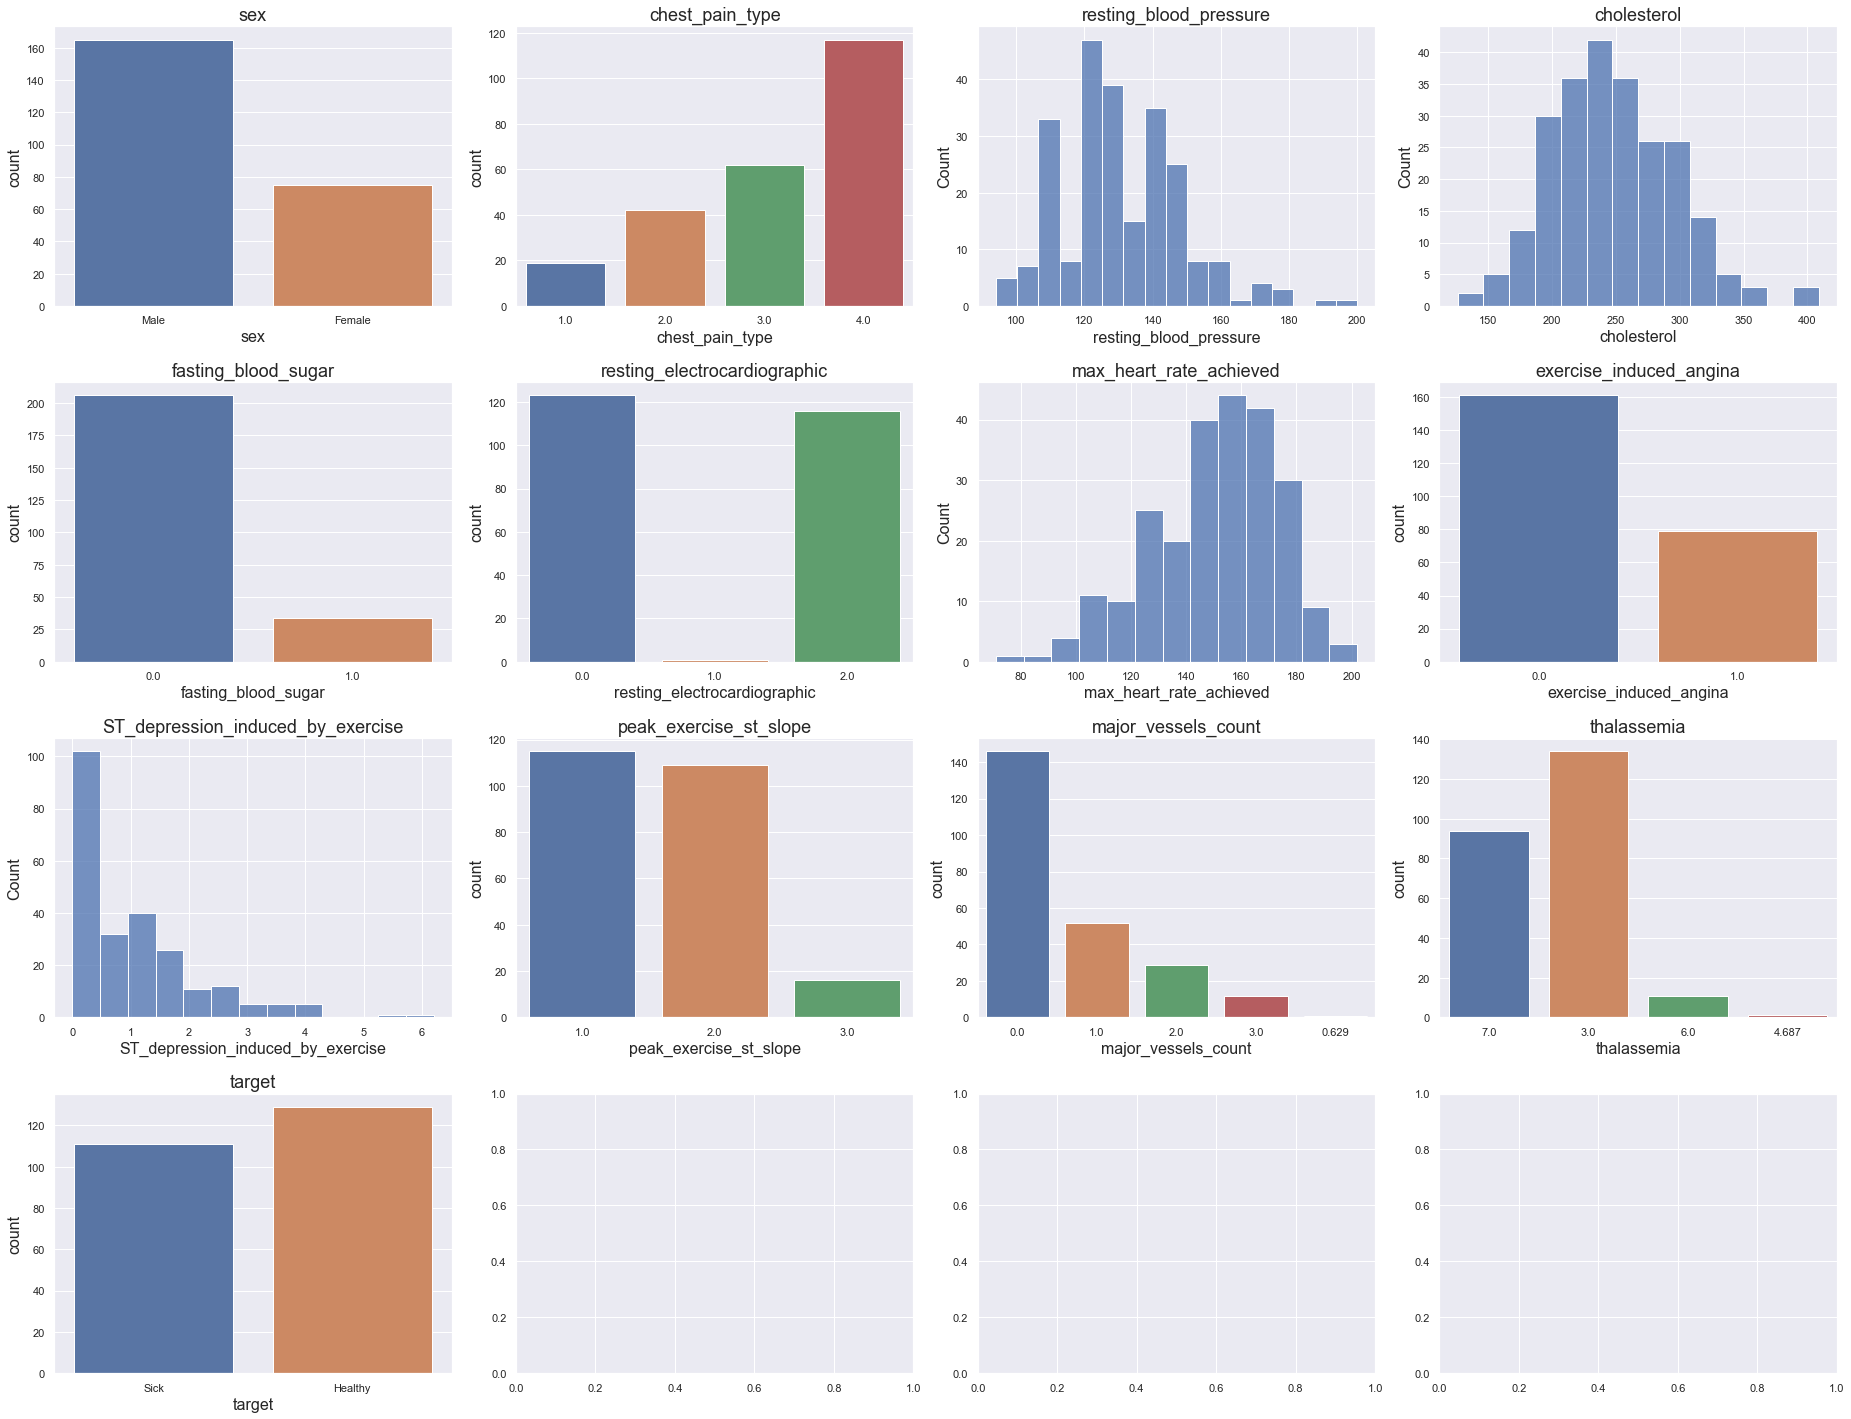

In [31]:
fig, axes = plt.subplots(4,4,figsize=(26,20))

for index, columnName in enumerate(hd_train.columns[1:]):
    ax = axes.reshape(-1)[index]
    if hd_train[columnName].dtype.kind == 'O':
        a = sns.countplot(x=columnName,data=hd_train,ax=ax)
    else:
        b = sns.histplot(x=columnName,data=hd_train,ax=ax)
    t = ax.set_title(columnName)
plt.tight_layout()

## Fixing Skewed Data

In [32]:
# determine index for continuous variables
numerical_features = hd_train.dtypes[hd_train.dtypes!='object'].index
# calculate skew and sort
skewed_features = hd_train[numerical_features].skew().sort_values(ascending=False)
pd.DataFrame({'Skew':skewed_features})

,Skew
ST_depression_induced_by_exercise,1.466493
resting_blood_pressure,0.724662
cholesterol,0.411143
age,-0.161032
max_heart_rate_achieved,-0.565126


In [33]:
hd_train["max_heart_rate_achieved"] = hd_train["max_heart_rate_achieved"]**2
hd_train["resting_blood_pressure"] = 1/hd_train["resting_blood_pressure"]
hd_train["cholesterol"] = hd_train["cholesterol"]**0.5

In [34]:
skewed_features = hd_train[numerical_features].skew().sort_values(ascending=False)
pd.DataFrame({'Skew':skewed_features})

,Skew
ST_depression_induced_by_exercise,1.466493
cholesterol,0.098258
resting_blood_pressure,0.071072
age,-0.161032
max_heart_rate_achieved,-0.174883


Transforming the data scale using a square for the left skewed data, a square root on the right skewed data and an inverse on the more significantly right skewed data looks to have improved the distribution. We can confirm this visually as well by calling the histogram's again.

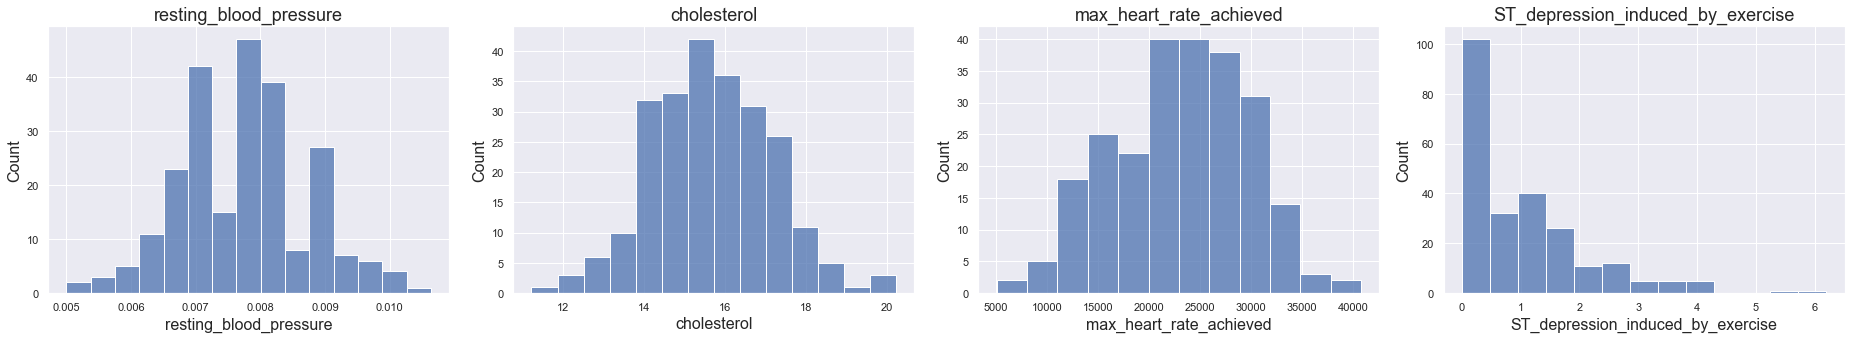

In [35]:
fig, axes = plt.subplots(1,4,figsize=(26,5))

for index, columnName in enumerate(hd_train[numerical_features].columns[1:]):
    ax = axes.reshape(-1)[index]
    if hd_train[columnName].dtype.kind == 'O':
        a = sns.countplot(x=columnName,data=hd_train,ax=ax)
    else:
        b = sns.histplot(x=columnName,data=hd_train,ax=ax)
    t = ax.set_title(columnName)
plt.tight_layout()

## Continuous Variables
We'll add some scatterplots and histograms to continue analyzing our numerical data.

In [36]:
sns.set(rc = {'figure.figsize':(8,8)})

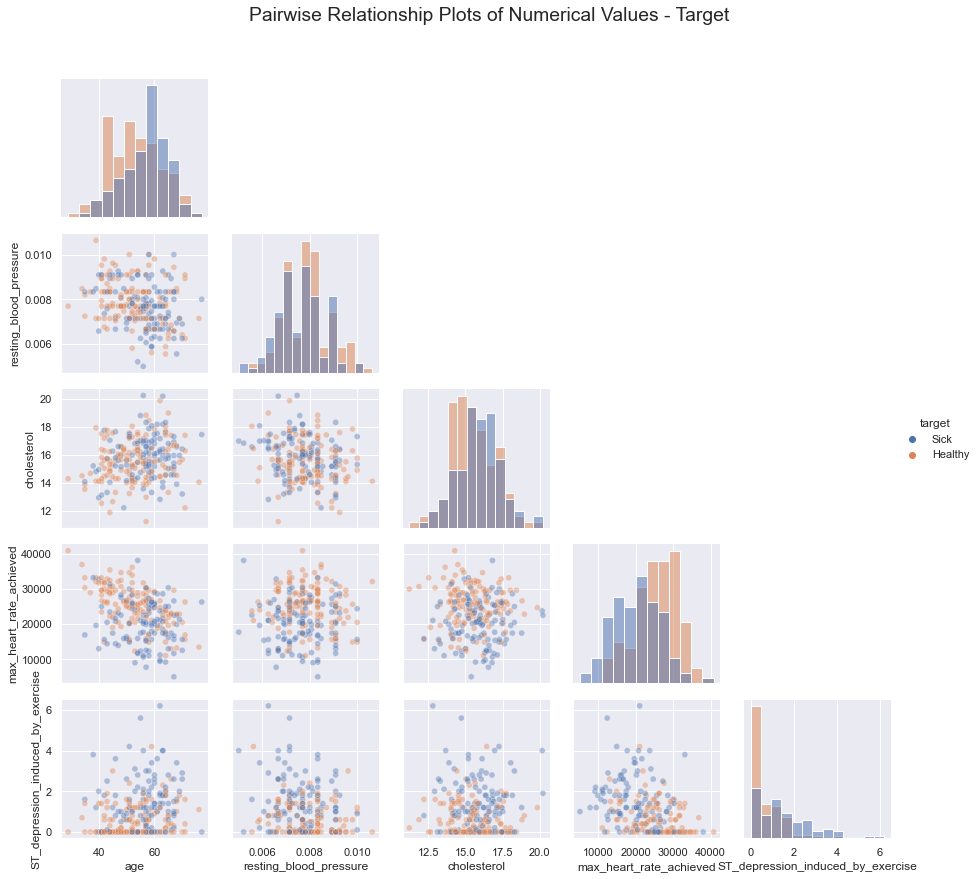

In [37]:
sns.set_context(rc={"font.size":16,"axes.titlesize":12,"axes.labelsize":12,})
#Note: sns calls are saved to variables again to suppress unwanted text in output cell
pairwise_viz = sns.PairGrid(hd_train, vars=integerAttributesKey, hue="target", diag_sharey=False, corner=True)
pairwise_lower = pairwise_viz.map_lower(sns.scatterplot, alpha=0.4)
pairwise_diag = pairwise_viz.map_diag(sns.histplot)
pairwise_legend = pairwise_viz.add_legend()
pairwise_adj = pairwise_viz.fig.subplots_adjust(top=0.9)
pairwise_subtitle = pairwise_viz.fig.suptitle("Pairwise Relationship Plots of Numerical Values - Target")

It looks like there is a bit of a "binning" of data for the resting blood pressure. This may be a result of different methods of collecting blood pressure that resulted in a some jumps between values due to the level of precision of the measurements. We won't treat the data for this.

It looks like there are a lot of individuals that had no ST depression induced by exercise (value of 0). It might be interesting to see how the target responds to those with and without this value present. Let's dive into that.

<AxesSubplot:xlabel='ST_depression_induced_by_exercise', ylabel='Count'>

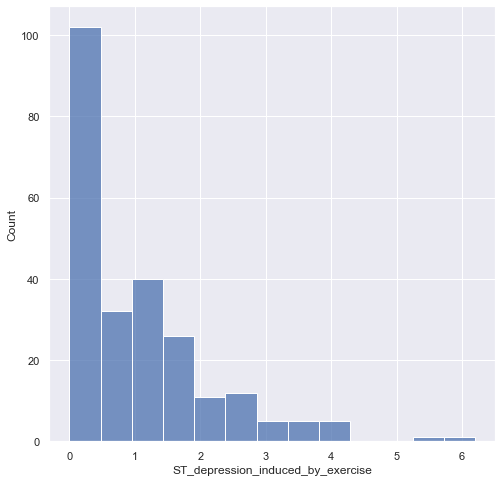

In [38]:
sns.histplot(x="ST_depression_induced_by_exercise",data=hd_train)

Based on research for what ST depression induced by exercise is, we find that it is a measure of change in an ECG reading after exercise. Subjects with a "0" are subjects that did not have any ST depression, where subjects with a non-zero value had some ST depression present. Thus, the "0" values will not be removed and will be considered correct. It could be interesting to come back and bin the data into a "yes/no" categorical for use in model building.

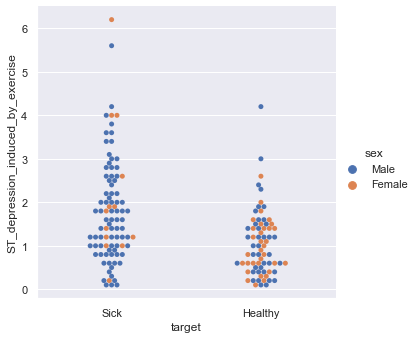

In [39]:
sns.catplot(x="target", y="ST_depression_induced_by_exercise", kind="swarm", hue="sex", data=hd_train[hd_train["ST_depression_induced_by_exercise"] != 0])

<AxesSubplot:xlabel='target', ylabel='count'>

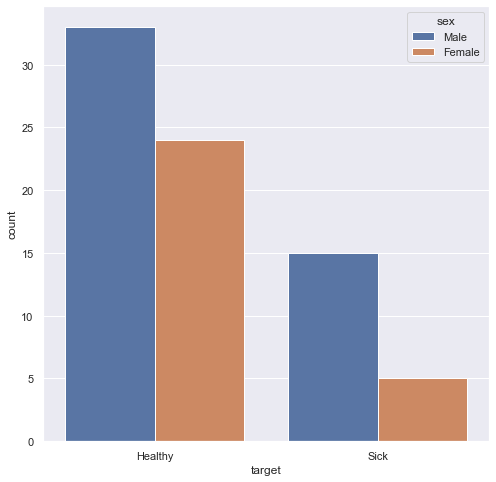

In [40]:
sns.countplot(x="target", hue="sex", data=hd_train[hd_train["ST_depression_induced_by_exercise"] == 0.0])

It looks like non-zero levels of ST depression induced by exercise are more prevalent in males, and those that have higher values (above ~2.5) have a greater tendency to have heart disease. We can also see that males with zero values have a greater chance of heart disease. Let's see what the impact of sex and age is on heart disease is.

<AxesSubplot:xlabel='target', ylabel='Density'>

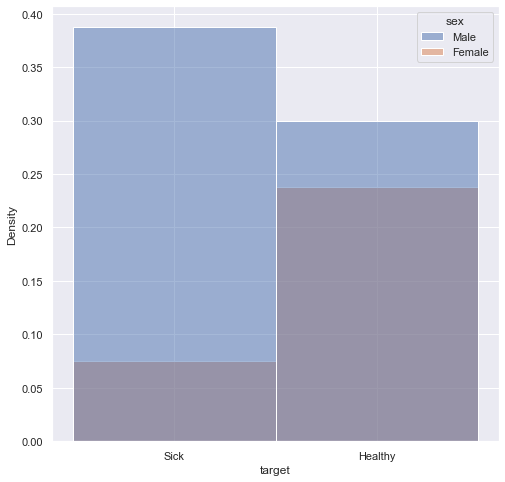

In [41]:
sns.histplot(x="target", stat="density", hue="sex", data=hd_train)

<AxesSubplot:xlabel='age', ylabel='Count'>

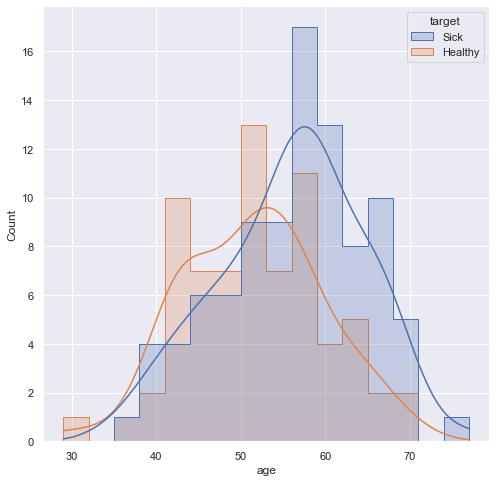

In [42]:
sns.histplot(hd_train[hd_train["sex"] == "Male"], x="age", hue="target", element="step", kde=True, binwidth=3)

<AxesSubplot:xlabel='age', ylabel='Count'>

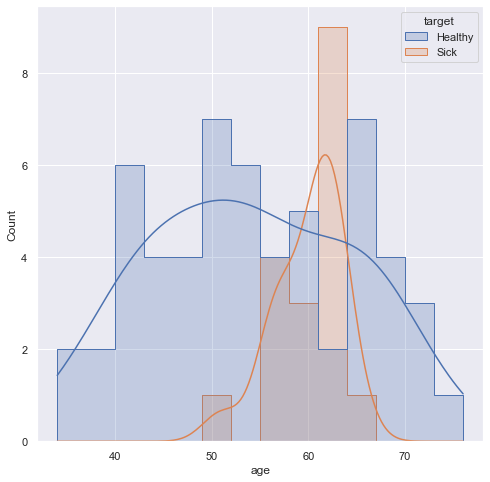

In [43]:
sns.histplot(hd_train[hd_train["sex"] == "Female"], x="age", hue="target", element="step", kde=True, binwidth=3)

It looks like our data is generally showing that males are more likely to have heart disease than females. Males with an average age of ~58 and females with an average age of ~63 are more prone to heart disease. It's important to note that this is a relatively small dataset, making it difficult to draw conclusions with confidence.


We can take a look to see if we see any other interesting differences between males and females. Nothing jumps out immediately for further exploration in this direction.

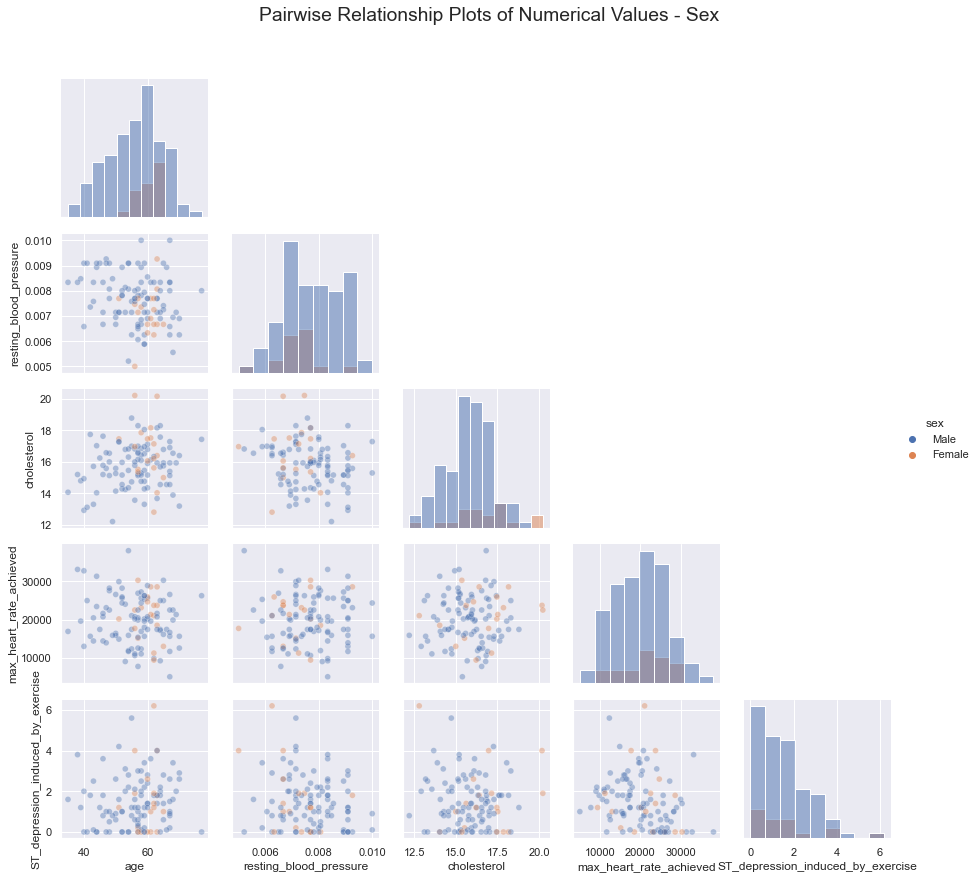

In [44]:
pairwise_viz = sns.PairGrid(hd_train[hd_train["target"]=="Sick"], vars=integerAttributesKey, hue="sex", diag_sharey=False, corner=True)
pairwise_lower = pairwise_viz.map_lower(sns.scatterplot, alpha=0.4)
pairwise_diag = pairwise_viz.map_diag(sns.histplot)
pairwise_legend = pairwise_viz.add_legend()
pairwise_adj = pairwise_viz.fig.subplots_adjust(top=0.9)
pairwise_subtitle = pairwise_viz.fig.suptitle("Pairwise Relationship Plots of Numerical Values - Sex")

# Feature Selection

We can explore the data to see if there are any attributes that are correlated. This will help us determine which attributes we might consider keeping for predictions so that our linear models do not suffer from a collinearity issue.

<Figure size 1008x576 with 0 Axes>

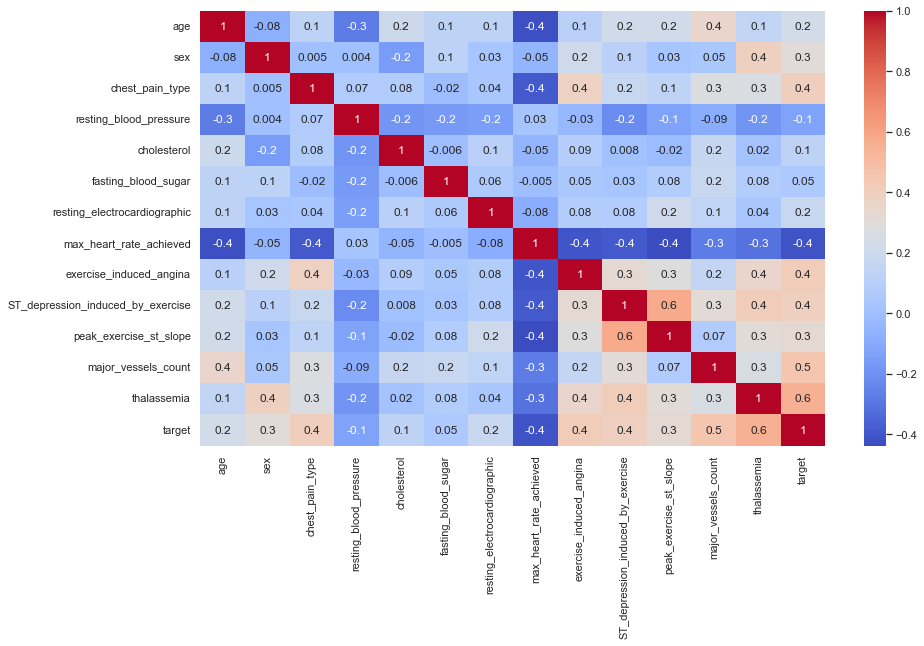

In [45]:
hd_train["target"] = hd_train["target"].replace(["Healthy", "Sick"],[0,1])
hd_train["sex"] = hd_train["sex"].replace(["Female", "Male"],[0,1])
hd_train = hd_train[hd_train["major_vessels_count"]!="?"]
hd_train = hd_train[hd_train["thalassemia"]!="?"]
hd_train = hd_train.apply(pd.to_numeric)

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = hd_train.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g')

We can see from the matrix above that thalassemia looks to be well correlated with the target, and ST depression is correlated with peak exercise at ST slope. The cutoff for correlation in academic literature tends to range between 0.6-0.9. Based on this, we will not immediately remove any of the features.

We could consider removing fasting blood sugar, cholesterol and resting blood pressure to compare performance of datasets, as these attributes may be introducing some noise in the predictions.

# Predictive Models

## Processing Functions
Before we start building our models, we will define some functions that we will use to process our data based on the exploratory data analysis we have completed. This will ensure that we are avoiding data leakage, and that the way we treat our training and test data sets is consistent.

In [46]:
def outliers_removal(training_dataset):
    """
    Function removes rows with missing values and outliers in cholestoral. This function should only be called on the training dataset.
    :param training_dataset: dataframe that will be used for training
    :return: datafram with missing values and outliers removed
    """
    training_dataset = training_dataset[training_dataset["cholesterol"]<450]
    return training_dataset

def impute_values(dataset):
    dataset.loc[dataset["thalassemia"] == "?", "thalassemia"] = float(4.687)
    dataset.loc[dataset["major_vessels_count"] == "?", "major_vessels_count"] = float(0.629)
    return dataset

def transformation(dataset):
    """
    Function adjusts skewness in max heart rate and resting blood pressure data
    :param dataset: dataframe that will be used for training or in prediction on data
    :return: dataframe with adjusted data
    """
    dataset["max_heart_rate_achieved"] = dataset["max_heart_rate_achieved"]**2
    dataset["resting_blood_pressure"] = 1/dataset["resting_blood_pressure"]
    dataset["cholesterol"] = dataset["cholesterol"]**0.5
    return dataset

def one_hot_encode(dataset):
    #categorical data
    categorical_cols = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina']
    dataset = pd.get_dummies(dataset, columns = categorical_cols)
    return dataset

In [47]:
### IMPORT TRAINING DATA
hdd = pd.read_csv('../data/processed/train', header=0, index_col=0)
hdd = outliers_removal(hdd)
hdd = impute_values(hdd)
hdd = transformation(hdd)
hdd = one_hot_encode(hdd)

In [48]:
columns_to_keep = [x for x in range(hdd.shape[1]) if x not in [10]]
X = hdd.iloc[:,columns_to_keep]
y = hdd.iloc[:,10]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Selection and building

# Feature Scaling

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Saving Model Result

In [50]:
results_df = pd.DataFrame(index=['Decision Tree (Default)'],
                          columns=['F-score (cv)', 'Precision (cv)','Recall (cv)', 'Accuracy (cv)'])

# Model Building Process
For all model building, we will start by building a model using default parameters, then expand it with cross fold validation, and then apply hyper tuning. All the results will be saved to the `results_df` dataframe for comparison. The same approach will be followed for each model. Models that require more computation time for hyper tuning (like random forest and neural net) will start by using a random search to approximate the current parameters, followed by a full grid search to confirm them.

# Decision Tree Model Building

In [51]:
#without hyperparameter tuning
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_fit = dt.fit(X_train,y_train)

#Predict the response for test dataset
dt_predict = dt_fit.predict(X_test)

results_df.loc['Decision Tree (Default)',:] = [f1_score(y_test,dt_predict, average='macro'), precision_score(y_test,dt_predict), recall_score(y_test,dt_predict),accuracy_score(y_test,dt_predict)]
results_df.sort_values(by='F-score (cv)', ascending=False)


,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Decision Tree (Default),0.774004,0.772727,0.73913,0.77551


# Cross_Fold Validation

In [52]:
#cross fold validation without hyper tuning
cv = KFold(n_splits=10, random_state=42, shuffle=True)
dt = DecisionTreeClassifier()
cross_val_results = pd.DataFrame(cross_validate(dt, X_train, y_train, cv = cv,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Decision Tree (CV)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df


,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Decision Tree (Default),0.774004,0.772727,0.73913,0.77551
Decision Tree (CV),0.716439,0.731061,0.749061,0.729474


# Hyperparameter tuning of DT using RandomizedSearchCV
In RandomizedSearchCV,not all hyperparameter values are used. Instead, a fixed number of hyperparameters are sampled from specified probability distributions.The following hyperparameter are chosen for tuning:

"max_depth":[3,None]
max_depth: The maximum depth of the tree.The higher value of maximum depth causes overfitting, and a lower value causes underfitting. So, we set 3 to none.
"min_samples_leaf":randint(1,20),
min_samples_leaf: The minimum number of samples required to be at a leaf node. We set random value to be chosen from 1 to 20.
"criterion":["gini","entropy"]
criterion: The function to measure the quality of a split. We set both gini and entropy to choose the best one for this decision tree model.

In [53]:
#paramters setup for tuning
param={"max_depth":[3,None],"min_samples_leaf":randint(1,20),"criterion":["gini","entropy"]}

#instatiate decision tree classifier
clf = DecisionTreeClassifier()

#instatiate RandomizedSearchCV
clf_cv=RandomizedSearchCV(clf,param,cv=5)

#fitting the model
clf_cv.fit(X_train,y_train)

cross_val_results = pd.DataFrame(cross_validate(clf_cv.best_estimator_ , X_train, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Decision Tree (Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f97aa8b4070>})

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Decision Tree (Default),0.774004,0.772727,0.73913,0.77551
Decision Tree (Hyper Parameter Tuning),0.762113,0.767856,0.761335,0.765992
Decision Tree (CV),0.716439,0.731061,0.749061,0.729474


# Logistic Regression Model Building

In [54]:
# Training the Logistic Regression model on the Training set
lr = LogisticRegression(random_state=42)
lr_fit = lr.fit(X_train, y_train)
# Predicting the Test set results
lr_predict = lr_fit.predict(X_test)

results_df.loc['Logistic Regression (Default)',:] = [f1_score(y_test,lr_predict, average='macro'), precision_score(y_test,lr_predict), recall_score(y_test,lr_predict),accuracy_score(y_test,lr_predict)]
results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Decision Tree (Default),0.774004,0.772727,0.73913,0.77551
Decision Tree (Hyper Parameter Tuning),0.762113,0.767856,0.761335,0.765992
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102
Decision Tree (CV),0.716439,0.731061,0.749061,0.729474


In [55]:
#cross_fold validation without hyperparameter tuning
cv = KFold(n_splits=10, random_state=42, shuffle=True)
lr = LogisticRegression()

cross_val_results = pd.DataFrame(cross_validate(lr, X_train, y_train, cv = cv,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Logistic Regression (CV)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values


results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression (CV),0.824832,0.830054,0.843951,0.833421
Decision Tree (Default),0.774004,0.772727,0.73913,0.77551
Decision Tree (Hyper Parameter Tuning),0.762113,0.767856,0.761335,0.765992
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102
Decision Tree (CV),0.716439,0.731061,0.749061,0.729474


# Hyperparameter tuning for logistic regression model
Here, we are using grid searching for parameter tuning.
The following hyperparameter are chosen for tuning: solver[‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
There are five solver used in sklearn. Each solver uses to find the parameter weights that minimize the cost function.
penalty[‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
Regularization addresses the problem of over-fitting by penalizing the parameters.
We set the four penalties. C [100, 10, 1.0, 0.1, 0.01]
The C parameter controls the penalty strength, which can also be effective.
max_iteration [20, 50, 100, 200, 500, 1000]
We set some random values in max_iteration to find out which iteration will be best for the solver to converge.

In [56]:
# define models and parameters
lr = LogisticRegression()
solvers = ['lbfgs','newton-cg','liblinear','sag','saga']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iteration= [20, 50, 100, 200, 500, 1000]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,max_iter=max_iteration)
cv = KFold(n_splits=10, random_state=42, shuffle=True)

lr_grid = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
lr_grid_fit = lr_grid.fit(X_train, y_train)

cross_val_results = pd.DataFrame(cross_validate(lr_grid.best_estimator_, X_train, y_train, cv = cv, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Logistic Regression (Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/adambroniewski/.local/share/virtualenvs/Machine-Learning-Project-QM2H3y13/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/adambroniewski/.local/s

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression (Hyper Parameter Tuning),0.831229,0.838388,0.847523,0.838684
Logistic Regression (CV),0.824832,0.830054,0.843951,0.833421
Decision Tree (Default),0.774004,0.772727,0.73913,0.77551
Decision Tree (Hyper Parameter Tuning),0.762113,0.767856,0.761335,0.765992
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102
Decision Tree (CV),0.716439,0.731061,0.749061,0.729474


In [57]:
lr_grid.best_params_

{'C': 100, 'max_iter': 20, 'penalty': 'l1', 'solver': 'liblinear'}

# Random Forest

In [58]:
rf = RandomForestClassifier(n_estimators=20, random_state=42, max_depth=4)
rf_fit = rf.fit(X_train, y_train)
# Predicting the Test set results
rf_predict = rf_fit.predict(X_test)

results_df.loc['Random Forest (Default)',:] = [f1_score(y_test,rf_predict, average='macro'), precision_score(y_test,rf_predict), recall_score(y_test,rf_predict),accuracy_score(y_test,rf_predict)]
results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression (Hyper Parameter Tuning),0.831229,0.838388,0.847523,0.838684
Logistic Regression (CV),0.824832,0.830054,0.843951,0.833421
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Decision Tree (Default),0.774004,0.772727,0.73913,0.77551
Decision Tree (Hyper Parameter Tuning),0.762113,0.767856,0.761335,0.765992
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102
Decision Tree (CV),0.716439,0.731061,0.749061,0.729474


In [59]:
rf = RandomForestClassifier(n_estimators=20, random_state=42, max_depth=4)

cross_val_results = pd.DataFrame(cross_validate(rf, X_train, y_train, cv = 5,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

In [60]:
results_df.loc['Random Forest (CV)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

,F-score (cv),Precision (cv),Recall (cv),Accuracy (cv)
Logistic Regression (Hyper Parameter Tuning),0.831229,0.838388,0.847523,0.838684
Logistic Regression (CV),0.824832,0.830054,0.843951,0.833421
Random Forest (Default),0.815094,0.818182,0.782609,0.816327
Random Forest (CV),0.803888,0.809539,0.803259,0.807287
Decision Tree (Default),0.774004,0.772727,0.73913,0.77551
Decision Tree (Hyper Parameter Tuning),0.762113,0.767856,0.761335,0.765992
Logistic Regression (Default),0.754181,0.73913,0.73913,0.755102
Decision Tree (CV),0.716439,0.731061,0.749061,0.729474


# Random Forest with Hyperparameter Tuning
We can start hypertuning by using a randomized parameter search to get an idea of the right parameters. We will then use the correct range of parameters on a full parameter grid search

In [ ]:
rf = RandomForestClassifier()
n_estimators = [1,5,10,40,100,200,500,1000,2000,5000]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [1,3,5,7,9,11,13,15,20]
criterion= ['gini', 'entropy']

grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, criterion=criterion)

cv = KFold(n_splits=10, random_state=42, shuffle=True)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 100, cv = cv, verbose=2, random_state=42, n_jobs = -1)
rf_random_fit = rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
rf_random.best_params_

In [ ]:
cross_val_results = pd.DataFrame(cross_validate(rf_random.best_estimator_ , X_train, y_train, cv = cv, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Random Forest (Randomized Parameters)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

In [ ]:
rf = RandomForestClassifier()
n_estimators = [50,200,300,400,500,600,800,1000]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [1,2,3,4,5]
criterion= ['gini', 'entropy']

grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, criterion=criterion)
cv = KFold(n_splits=10, random_state=42, shuffle=True)

rf_grid = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
rf_grid_fit = rf_grid.fit(X_train, y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
cross_val_results = pd.DataFrame(cross_validate(rf_grid.best_estimator_ , X_train, y_train, cv = cv, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Random Forest (Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

# Neural Network Model

In [ ]:
nnet = MLPClassifier(hidden_layer_sizes=[1],
                           alpha=0,
                           activation='logistic',
                           max_iter=400,
                           solver='lbfgs',random_state=42)

cross_val_results = pd.DataFrame(cross_validate(nnet , X_train, y_train, cv = 5,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

In [ ]:
results_df.loc['MLP [1]',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

In [ ]:
# changing the size of hidden layer

nnet_deep = MLPClassifier(hidden_layer_sizes=[2,2,2],
                           alpha=0.001,
                           activation='logistic',
                           max_iter=1000,
                           solver='lbfgs',random_state=42)

cross_val_results = pd.DataFrame(cross_validate(nnet_deep , X_train, y_train, cv = 5,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['MLP [2,2,2]-alpha=0.001',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

# Neural Network with hyperparameter tuning

In [ ]:
sizes = [2*i for i in range(1,5)]
sizes = sizes + [[2*i,2*i] for i in range(1,5)]
sizes = sizes + [[2*i,2*i, 2*i] for i in range(1,5)]

decays = [0.00001,0.0001,0.001,0.01,0.1,0.5,1]

nnet = MLPClassifier(alpha=0,
                           activation='logistic',
                           max_iter=500,
                           solver='lbfgs',
                           random_state=42)

nnet_grid = GridSearchCV(estimator=nnet,
                   scoring=['f1_macro', 'precision_macro', 'recall_macro', 'accuracy'],
                   param_grid={'hidden_layer_sizes': sizes,
                              'alpha': decays},
                   cv=10,
                   return_train_score=True,
                   refit='f1_macro')

cross_val_results = pd.DataFrame(cross_validate(nnet_grid , X_train, y_train, cv = 10, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['MLP (Hyper Parameter Tuning)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

# Testing Models with Feature Engineering
### Redefine processing functions and import data

In [ ]:
def one_hot_encode_feature_engineer(dataset):
    #categorical data
    categorical_cols = ['sex', 'exercise_induced_angina']
    dataset = pd.get_dummies(dataset, columns = categorical_cols)
    return dataset

def transformation_feature_engineer(dataset):
    """
    Function adjusts skewness in max heart rate and resting blood pressure data
    :param dataset: dataframe that will be used for training or in prediction on data
    :return: dataframe with adjusted data
    """
    dataset["max_heart_rate_achieved"] = dataset["max_heart_rate_achieved"]**2
    return dataset

In [ ]:
### IMPORT TRAINING DATA
hdd = pd.read_csv('../data/processed/train', header=0, index_col=0)
hdd.drop(columns=["fasting_blood_sugar", "cholesterol", "resting_blood_pressure"], inplace=True)
# Note: we don't call outlier removal as it was only working on cholesterol, which is a column we dropped.
hdd = impute_values(hdd)
hdd = transformation_feature_engineer(hdd)
hdd = one_hot_encode_feature_engineer(hdd)

In [ ]:
columns_to_keep = [x for x in range(hdd.shape[1]) if x not in [8]]
X = hdd.iloc[:,columns_to_keep]
y = hdd.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

### Logisitic Regression + Feature Selection + Hyper Tune

In [ ]:
# define models and parameters
lr = LogisticRegression()
solvers = ['lbfgs','newton-cg','liblinear','sag','saga']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iteration= [20, 50, 100, 200, 500, 1000]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,max_iter=max_iteration)
cv = KFold(n_splits=10, random_state=42, shuffle=True)

lr_grid = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
lr_grid_fit = lr_grid.fit(X_train, y_train)

cross_val_results = pd.DataFrame(cross_validate(lr_grid.best_estimator_, X_train, y_train, cv = cv, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['FS - Logistic Regression (HT)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

### Logisitic Regression + Feature Selection + CV

In [ ]:
#cross_fold validation without hyperparameter tuning
cv = KFold(n_splits=10, random_state=42, shuffle=True)
lr = LogisticRegression()

cross_val_results = pd.DataFrame(cross_validate(lr, X_train, y_train, cv = cv,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['FS - Logistic Regression (CV)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values


results_df.sort_values(by='F-score (cv)', ascending=False)

### Neural Net + Feature Selection

In [ ]:
# changing the size of hidden layer

nnet_deep = MLPClassifier(hidden_layer_sizes=[2,2,2],
                           alpha=0.001,
                           activation='logistic',
                           max_iter=1000,
                           solver='lbfgs',random_state=42)

cross_val_results = pd.DataFrame(cross_validate(nnet_deep , X_train, y_train, cv = 5,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['FS - MLP [2,2,2]-alpha=0.001',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

### Neural Net + Feature Selection + Hyper Tune

In [ ]:
sizes = [2*i for i in range(1,4)]
sizes = sizes + [[2*i,2*i] for i in range(1,4)]
sizes = sizes + [[2*i,2*i, 2*i] for i in range(1,4)]

decays = [0.0001,0.001,0.01,0.1,0.5]

nnet = MLPClassifier(alpha=0,
                           activation='logistic',
                           max_iter=500,
                           solver='lbfgs',
                           random_state=42)

nnet_grid = GridSearchCV(estimator=nnet,
                   scoring=['f1_macro', 'precision_macro', 'recall_macro', 'accuracy'],
                   param_grid={'hidden_layer_sizes': sizes,
                              'alpha': decays},
                   cv=5,
                   return_train_score=True,
                   refit='f1_macro')

cross_val_results = pd.DataFrame(cross_validate(nnet_grid , X_train, y_train, cv = 5, scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['FS - MLP (HT)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values

results_df.sort_values(by='F-score (cv)', ascending=False)

# Final Model Test

In [ ]:
hdd = pd.read_csv('../data/processed/train', header=0, index_col=0)

hdd = outliers_removal(hdd)
hdd = impute_values(hdd)
hdd = transformation(hdd)
hdd = one_hot_encode(hdd)

columns_to_keep = [x for x in range(hdd.shape[1]) if x not in [10]]
X_train = hdd.iloc[:,columns_to_keep]
y_train = hdd.iloc[:,10]

In [ ]:
hd_test = pd.read_csv('../data/processed/final_dataset_test', header=0, index_col=0)

hd_test = outliers_removal(hd_test)
hd_test = impute_values(hd_test)
hd_test = transformation(hd_test)
hd_test = one_hot_encode(hd_test)

columns_to_keep = [x for x in range(hd_test.shape[1]) if x not in [10]]
X_test = hd_test.iloc[:,columns_to_keep]
y_test = hd_test.iloc[:,10]

In [ ]:
X_test.shape

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = y_train.values.ravel()
X_test = scaler.transform(X_test)
y_test = y_test.values.ravel()

# Final Model Training
As the hypertuned linear regression model performed the best, we will use the parameters from the previously determined model. We will train the model on the entire training dataset this time.

In [ ]:
#cross_fold validation without hyperparameter tuning
cv = KFold(n_splits=10, random_state=42, shuffle=True)
lr_final = LogisticRegression(C=100, max_iter=20, penalty="l1", solver="liblinear")

cross_val_results = pd.DataFrame(cross_validate(lr_final, X_train, y_train, cv = cv,
                                                scoring = [ 'f1_macro', 'precision_macro', 'recall_macro', 'accuracy'] ))

results_df.loc['Final Model Validation (LR)',:] = cross_val_results[['test_f1_macro',
       'test_precision_macro', 'test_recall_macro','test_accuracy']].mean().values


results_df.sort_values(by='F-score (cv)', ascending=False)

In [ ]:
lr_final_fit = lr.fit(X_train, y_train)

lr_predict = lr_final_fit.predict(X_test)

In [ ]:
results_df.loc['Final Model Test (LR)',:] = [f1_score(y_test,lr_predict, average='macro'), precision_score(y_test,lr_predict), recall_score(y_test,lr_predict),accuracy_score(y_test,lr_predict)]
results_df.sort_values(by='F-score (cv)', ascending=False)